In [16]:
import numpy as np
import pandas as pd
from importlib import reload
import xarray as xr
import matplotlib.pyplot as plt
import preseason.tools as sf
import preseason.onset_demise as od
import preseason.plotting as pp

In [17]:
reload(pp)

<module 'preseason.plotting' from '/Users/gbromley/code/PreSeason/preseason/plotting.py'>

In [36]:
raw_data = pd.read_csv('/Users/gbromley/data/senamhi/yantac.txt', sep="\s+", header=None, parse_dates=[[0,1,2]], na_values=[-99.9])

In [37]:
df = raw_data.rename(columns={'0_1_2': 'time', 3: 'precip', 4:'max_temp', 5:'min_temp'})

<Axes: >

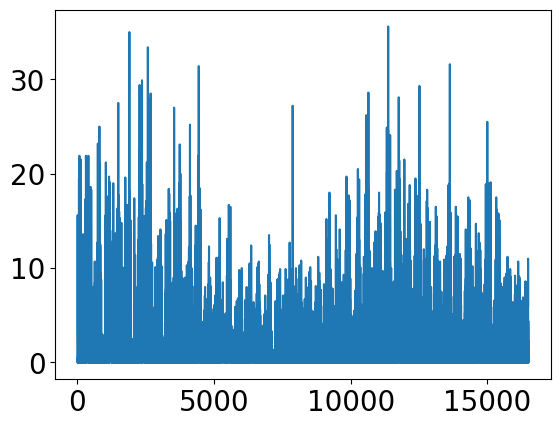

In [38]:
df['precip'].plot()

In [39]:
df = df.set_index(df['time'])

In [40]:
dataset = df['precip'].to_xarray()

In [41]:
annual_cycle = sf.calc_annual_cycle(dataset)

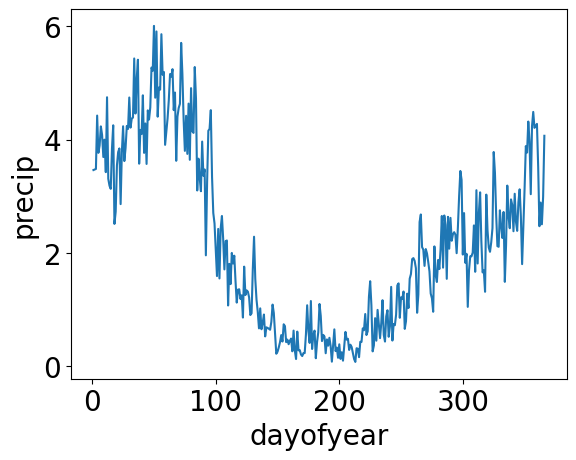

In [42]:
annual_cycle.plot()

In [46]:
data_anom = dataset - dataset.mean(dim='time')

annual_cycle = sf.calc_annual_cycle(dataset)
start_wet = od.B17_analysis_start(annual_cycle)

In [47]:
onset = od.onset_B17(data_anom, startWet=start_wet)

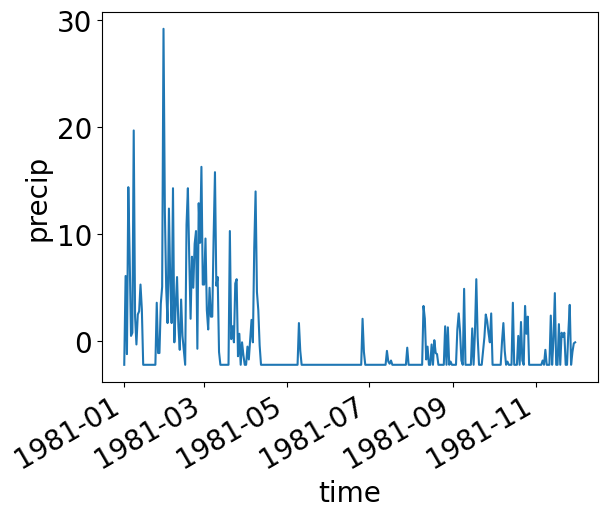

In [48]:
data_anom.sel(time='1981').plot()

In [49]:
demise = od.demise_B17(data_anom, startWet=start_wet)

In [50]:
dataset.sel(time=slice(date1, date2))

<xarray.DataArray 'precip' (time: 367)>
array([ 2.2,  2.9,  0.4,  0.2,  0. ,  0.4,  0. ,  1.1,  0.6,  0. ,  0. ,
        0. ,  2.5,  1.9,  0. ,  1.6,  3.1,  0. ,  0. ,  0.1,  0. ,  2. ,
        0. ,  4.1, 10.7,  6.6,  5.2,  0. ,  0. ,  0. ,  0. ,  0. ,  3.6,
        5.8,  3.7, 11.2,  1.7,  3.3, 12.2,  0. ,  5.6,  1.8,  0. ,  0.2,
        0. ,  0. , 10. , 10.1,  9.9,  5.3,  0. ,  0. ,  0. ,  0. ,  4.2,
        0. ,  0. ,  0.8,  0. ,  0. ,  0. ,  2.1,  8.9,  2.3,  0. ,  0. ,
       17.6,  2.4,  7.7,  8.6,  9.8,  4.9,  9.9,  7.7, 25.2,  0. ,  0. ,
       10.8,  8.1, 14.2,  8.1,  8.1, 11.8,  8.6,  3.4,  6.2,  0. ,  0. ,
        4. ,  2.9, 17.7,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  6.3,  0. ,  0. ,  5.3,  2.3,  0.1,  0. ,
        0. ,  0. ,  4.3,  4.1,  2.8,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.3,
        0. ,  0.9, 10. ,  5.1,  3.5,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.2,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  2.3,  2.7,  0. ,  0. ,  0. ,  5.9,  3.4,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  2.2,  0. ,  0. ,  0. ,  0. ,  0. ,  5.1,
        1.1,  0. ,  0. ,  0. ,  0. ,  2.1,  4.1,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  1.7,  0. ,  0. ,  2.2,  0. ,  0.7,  0. ,  0. ,
        2.2,  0. ,  0. ,  2.5,  8.1,  0. ,  1.9,  0. ,  3.3,  0. ,  0. ,
        0. ,  5.6,  0. ,  9.7,  0. ,  0. ,  0. ,  1.1,  0. ,  0. ,  0. ,
        7.2,  0. ,  5.3,  0. ,  4.7,  4.1,  0. ,  0. ,  0. ,  0. ,  0. ,
        3.7, 12.4, 11.3,  6.9,  3.6,  1.9,  4.2,  5.8,  0. , 14.5,  0. ,
        0. ,  7.4,  0.6,  7. ,  7.3,  0. ,  7.8, 11.9,  5.9,  1.2,  6.2,
        5.9,  1.6,  7.1,  6.2,  0. ,  2. ,  3.5,  0. ,  0. ,  6.7,  1.6,
        3.7,  4.6,  6.7,  0. ,  0. ,  0. ,  2.9,  0. ,  0. ,  0. ,  6.2,
        2.4,  0. ,  8. ,  3.6,  8.5,  5.6,  4.4,  1.9,  7.6,  2.8,  0. ,
        4.2,  0. , 11.4,  0. ,  7.3,  8.9,  0. ,  6. ,  4.2,  8.2,  2.9,
       10.6,  6.1,  1.3,  0. ,  3.3,  3.6,  0. ,  3.4,  2.4,  6.9,  1.1,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  3.7,
        0. ,  0. ,  0. ,  0. ])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 1981-01-01

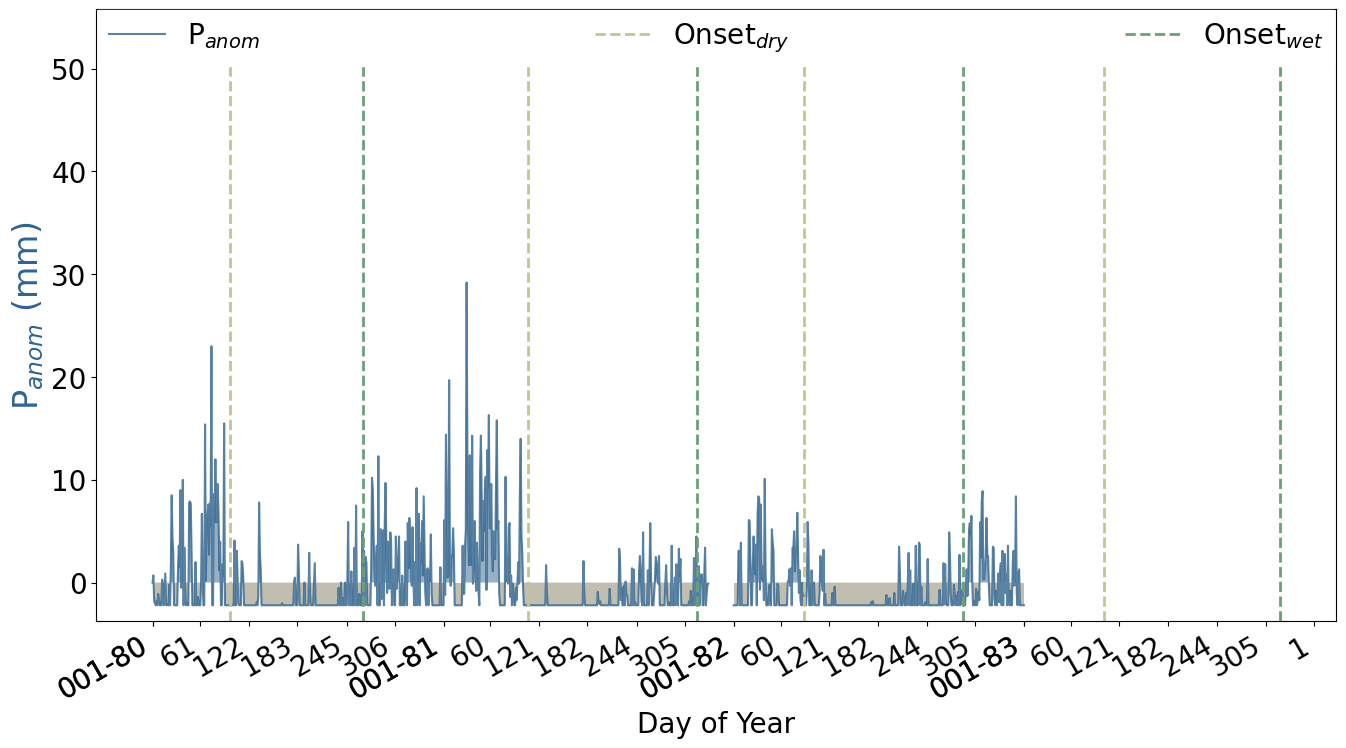

In [53]:
date1 = '1980-01-01'
date2 = '1983-01-01'
pp.plotOnsetTS(data_anom, onset, demise, time_slice=slice(date1, date2))